In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'openpowerlifting.csv')
df

C:\Users\angel\AppData\Local\Temp\ipykernel_45296\1421437210.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\angel\Documents\Portfolio Projects\Pandas data\openpowerlifting.csv')


In [3]:
#Seeing if the 4 attempt of every lifting is counts for the total weight or deleting the column
#Added in this cell but introduced the columnd drop in the drop columns cells
print(len(man_df.query('Deadlift4Kg == Best3DeadliftKg')))
print(len(man_df.query('Squat4Kg == Best3SquatKg')))
print(len(man_df.query('Bench4Kg == Best3BenchKg')))
print(len(women_df.query('Deadlift4Kg == Best3DeadliftKg')))
print(len(women_df.query('Squat4Kg == Best3SquatKg')))
print(len(women_df.query('Bench4Kg == Best3BenchKg')))
#Dropping not useful colunmns
df = df.drop(columns = ['Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'MeetCountry', 'MeetState', 'MeetName', 'Federation', 'Deadlift4Kg', 'Squat4Kg', 'Bench4Kg'])

13
14
17
11
2
4


In [23]:
women_df = df[df['Sex'] == 'F']
man_df = df[df['Sex'] == 'M']

In [24]:
#Reseting both indexed
women_df.reset_index(drop=True, inplace = True)

In [25]:
man_df.reset_index(drop= True, inplace = True)

<Axes: >

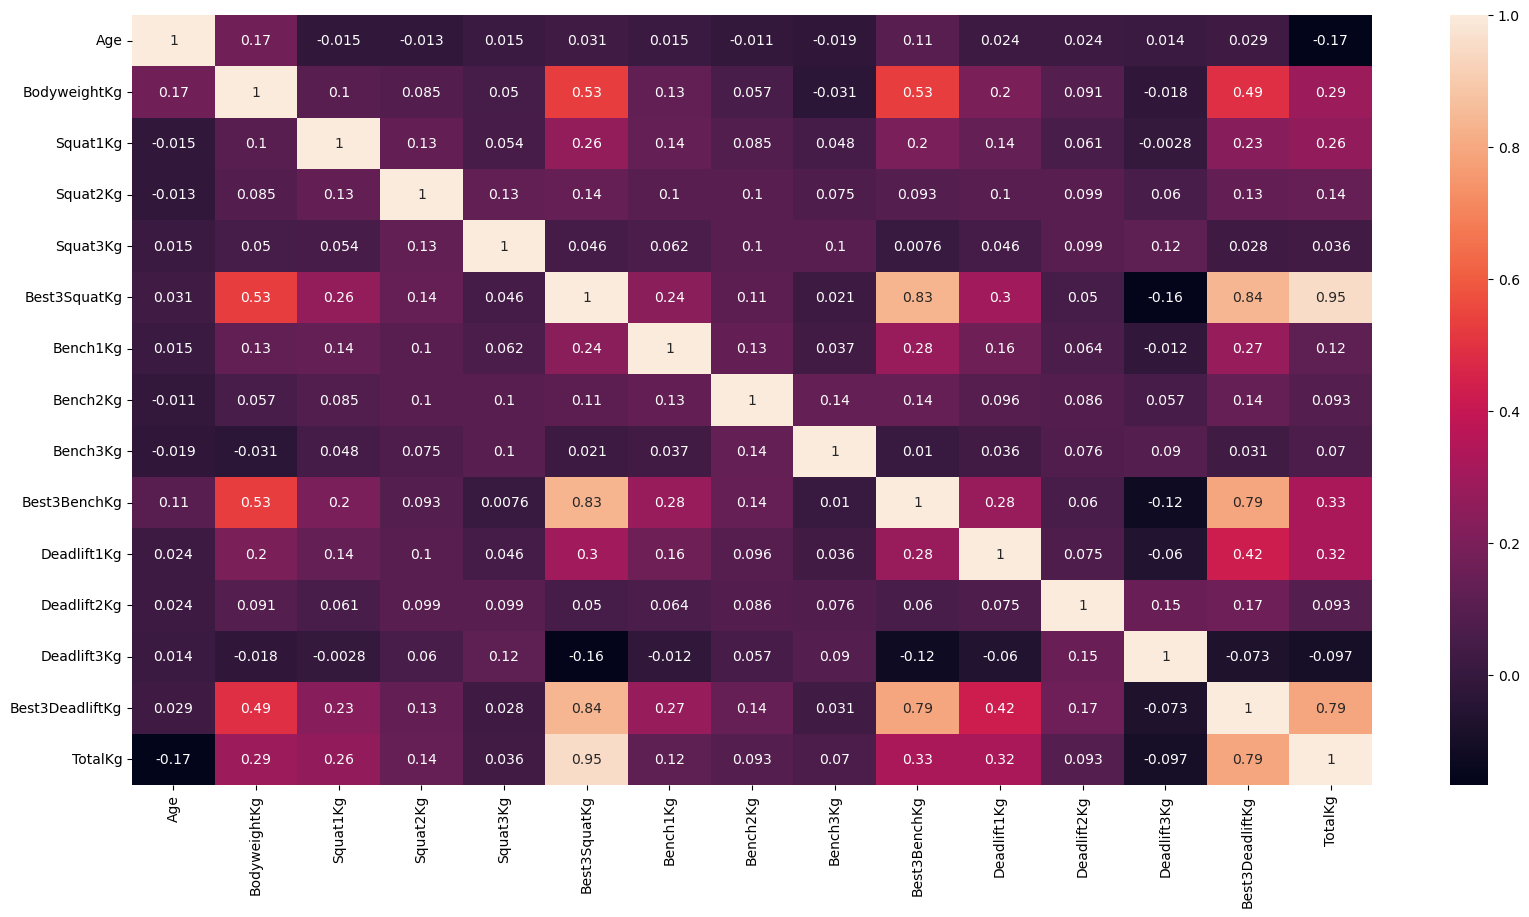

In [26]:
#Man correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(man_df.corr(numeric_only = True), annot = True)

<Axes: >

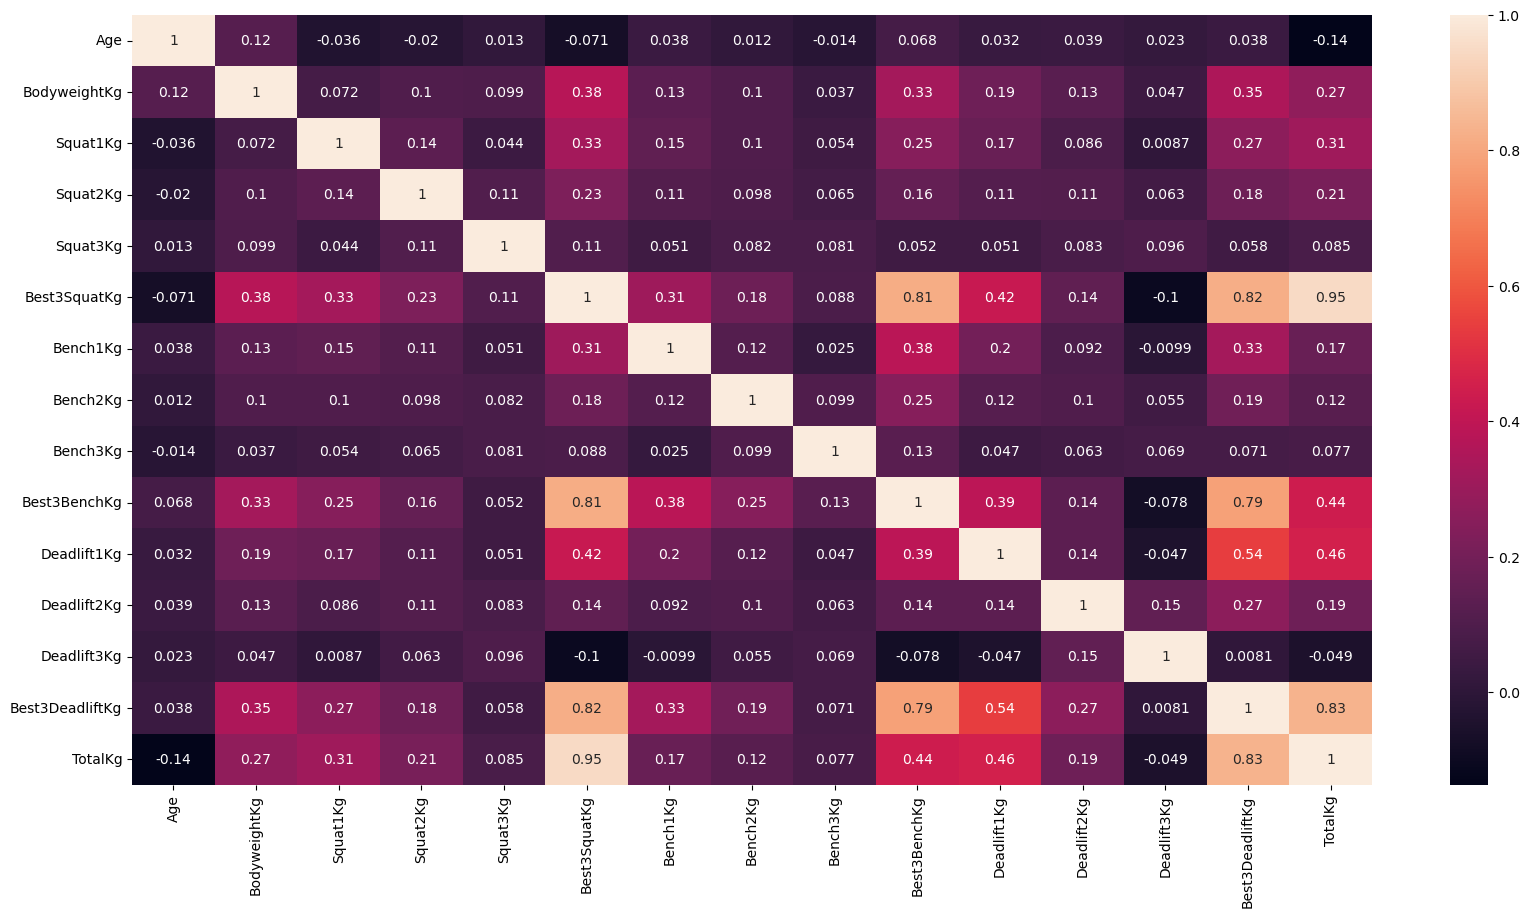

In [27]:
#Women correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(women_df.corr(numeric_only = True), annot = True)

In [28]:
#Filling NaN with No in 'Tested' column
women_df['Tested'].replace(np.nan,'No', inplace=True)
man_df['Tested'].replace(np.nan,'No', inplace=True)


C:\Users\angel\AppData\Local\Temp\ipykernel_45296\906669520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_df['Tested'].replace(np.nan,'No', inplace=True)
C:\Users\angel\AppData\Local\Temp\ipykernel_45296\906669520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_df['Tested'].replace(np.nan,'No', inplace=True)


In [29]:
#Dropping rows where TotalKg is NaN because are not useful
man_df = man_df.dropna(subset=['TotalKg']).sort_values(by='TotalKg', ascending = False)
women_df = women_df.dropna(subset=['TotalKg']).sort_values(by='TotalKg', ascending = False)
#Dropping rows where categorical WeightClass doesn't give information
man_df = man_df.drop(man_df[man_df['WeightClassKg'] == '+'].index)
women_df = women_df.drop(women_df[women_df['WeightClassKg'] == '+'].index)

In [30]:
women_df.groupby(['Event', 'Equipment', 'WeightClassKg']).mean(numeric_only = True)

Age  BodyweightKg  Squat1Kg  Squat2Kg  \
Event Equipment WeightClassKg                                                
B     Multi-ply 100            51.538462     96.482917       NaN       NaN   
                100+                 NaN           NaN       NaN       NaN   
                110            37.000000    108.872000       NaN       NaN   
                110+           36.750000    129.905000       NaN       NaN   
                44             28.840000     43.433684       NaN       NaN   
...                                  ...           ...       ...       ...   
SD    Wraps     82.5           14.000000     76.380000       NaN       NaN   
                90                   NaN     89.860000    107.50   115.000   
                90+            25.000000     98.880000       NaN       NaN   
                91.1           51.500000     87.633333     85.05    90.715   
                91.1+          25.000000           NaN       NaN       NaN   

                               Squat3Kg  Best3SquatKg    Bench1Kg    Bench2Kg  \
Event Equipment WeightClassKg                                                   
B     Multi-ply 100                 NaN           NaN   80.000000   40.625000   
                100+                NaN           NaN         NaN         NaN   
                110                 NaN           NaN  190.833333  105.833333   
                110+                NaN           NaN         NaN         NaN   
                44                  NaN           NaN   46.100800   34.912800   
...                                 ...           ...         ...         ...   
SD    Wraps     82.5                NaN    113.400000         NaN         NaN   
                90               120.00    105.360000         NaN         NaN   
                90+                 NaN     74.840000         NaN         NaN   
                91.1              96.39    108.863333         NaN         NaN   
                91.1+               NaN    192.780000         NaN         NaN   

                                Bench3Kg  Best3BenchKg  Deadlift1Kg  \
Event Equipment WeightClassKg                                         
B     Multi-ply 100           -40.625000    110.407083          NaN   
                100+                 NaN    100.500000          NaN   
                110            55.833333    185.004000          NaN   
                110+                 NaN    147.420000          NaN   
                44            -25.534400     54.090263          NaN   
...                                  ...           ...          ...   
SD    Wraps     82.5                 NaN           NaN          NaN   
                90                   NaN           NaN      125.000   
                90+                  NaN           NaN          NaN   
                91.1                 NaN           NaN       10.205   
                91.1+                NaN           NaN          NaN   

                               Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  \
Event Equipment WeightClassKg                                              
B     Multi-ply 100                    NaN          NaN              NaN   
                100+                   NaN          NaN              NaN   
                110                    NaN          NaN              NaN   
                110+                   NaN          NaN              NaN   
                44                     NaN          NaN              NaN   
...                                    ...          ...              ...   
SD    Wraps     82.5                   NaN          NaN           142.88   
                90                 142.500      150.000           120.36   
                90+                    NaN          NaN            95.25   
                91.1               121.335     -129.275           146.66   
                91.1+                  NaN          NaN           158.76   

                                  TotalKg  
Event Equip

In [60]:
man_df.groupby(['Event', 'Equipment', 'WeightClassKg']).mean(numeric_only = True)

Age  BodyweightKg  Squat1Kg  Squat2Kg  \
Event Equipment WeightClassKg                                                
B     Multi-ply 53.0           18.010638     48.578939       NaN       NaN   
                59.0           25.543624     55.018431       NaN       NaN   
                66.0           26.540441     59.419405       NaN       NaN   
                74.0           33.154809     66.410143       NaN       NaN   
                83.0           34.708583     78.009755       NaN       NaN   
...                                  ...           ...       ...       ...   
SD    Wraps     83.0           22.666667     78.981429   124.740  -133.810   
                93.0           35.500000     89.385000   149.690  -158.760   
                105.0          26.500000     98.654444   188.245   204.355   
                120.0          33.000000    108.254000       NaN       NaN   
                121.0          38.300000    130.031000       NaN       NaN   

                               Squat3Kg  Best3SquatKg   Bench1Kg   Bench2Kg  \
Event Equipment WeightClassKg                                                 
B     Multi-ply 53.0                NaN           NaN  60.350000  28.457556   
                59.0                NaN           NaN  68.060548  44.559792   
                66.0                NaN           NaN  76.969069  66.323792   
                74.0                NaN           NaN  83.745606  45.854437   
                83.0                NaN           NaN  99.215263  55.189997   
...                                 ...           ...        ...        ...   
SD    Wraps     83.0            -133.81    165.151429        NaN        NaN   
                93.0             172.37    218.860000        NaN        NaN   
                105.0             18.61    218.716667        NaN        NaN   
                120.0               NaN    230.588000        NaN        NaN   
                121.0               NaN    232.563636        NaN        NaN   

                                Bench3Kg  Best3BenchKg  Deadlift1Kg  \
Event Equipment WeightClassKg                                         
B     Multi-ply 53.0          -20.099759     80.337576          NaN   
                59.0           -7.385294    101.450049          NaN   
                66.0          -15.230169    116.704865          NaN   
                74.0          -22.339971    130.610857          NaN   
                83.0          -18.893980    164.677488          NaN   
...                                  ...           ...          ...   
SD    Wraps     83.0                 NaN           NaN       136.08   
                93.0                 NaN           NaN       190.51   
                105.0                NaN           NaN       201.39   
                120.0                NaN           NaN          NaN   
                121.0                NaN           NaN          NaN   

                               Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  \
Event Equipment WeightClassKg                                              
B     Multi-ply 53.0                   NaN          NaN              NaN   
                59.0                   NaN          NaN              NaN   
                66.0                   NaN          NaN              NaN   
                74.0                   NaN          NaN              NaN   
                83.0                   NaN          NaN              NaN   
...                                    ...          ...              ...   
SD    Wraps     83.0                147.42       158.76       197.167143   
                93.0                204.12      -219.99       223.960000   
                105.0               216.48       229.30       240.574444   
                120.0                  NaN          NaN       261.860000   
                121.0                  NaN          NaN       271.422727   

                                  TotalKg  
Event Equipment WeightClassKg        

In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(man_df['WeightClassKg'].value_counts())

83.0     230619
93.0     151343
105.0    145064
120.0    127537
121.0    121157
74.0      94849
66.0      47824
59.0      30383
53.0      21195
Name: WeightClassKg, dtype: int64


In [44]:
#Converting man weight class into numeric 
man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'\+$', value = '', regex = True)
man_df['WeightClassKg'] = pd.to_numeric(man_df['WeightClassKg'])
print(man_df['WeightClassKg'].value_counts())

100.0    80962
90.0     80641
82.5     70181
110.0    65027
75.0     57739
         ...  
70.5         1
69.5         1
68.5         1
74.5         1
50.0         1
Name: WeightClassKg, Length: 153, dtype: int64


In [58]:
#Assigning WeightClassKg to man_df based on IPF classification, 121 equals 120+
man_df.loc[man_df['WeightClassKg'] <= 53 , 'WeightClassKg' ] = 53
man_df.loc[(man_df['WeightClassKg'] > 53) & (man_df['WeightClassKg'] <= 59), 'WeightClassKg' ] = 59
man_df.loc[(man_df['WeightClassKg'] > 59) & (man_df['WeightClassKg'] <= 66), 'WeightClassKg' ] = 66
man_df.loc[(man_df['WeightClassKg'] > 66) & (man_df['WeightClassKg'] <= 74), 'WeightClassKg' ] = 74
man_df.loc[(man_df['WeightClassKg'] > 74) & (man_df['WeightClassKg'] <= 83), 'WeightClassKg' ] = 83
man_df.loc[(man_df['WeightClassKg'] > 83) & (man_df['WeightClassKg'] <= 93), 'WeightClassKg' ] = 93
man_df.loc[(man_df['WeightClassKg'] > 93) & (man_df['WeightClassKg'] <= 105), 'WeightClassKg' ] = 105
man_df.loc[(man_df['WeightClassKg'] > 105) & (man_df['WeightClassKg'] <= 120), 'WeightClassKg' ] = 120
man_df.loc[man_df['WeightClassKg'] > 120, 'WeightClassKg' ] = 121

In [ ]:
#Attempt of changing weight classes with RegEx
#RegEx for chanching classes to IPF 
# #Class 53-
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^([0-4][0-9]|5[0-2]|53$)($|\.\d$|\.\d\+$|\+$)', value = '53-', regex = True)
# #Class 59 assuming the exact weight enters the upper class
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(53\.\d\+?$|5[3-8]\.?\d?|59$)($|\.\d$|\.\d\+$|\+$)', value = '59-', regex = True)
# #Class 69
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(59\.1\d1\+?|6[0-5]|66$)($|\.\d$|\.\d\+$|\+$)', value = '66-', regex = True)
# #Class 74
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(66\.{1}\d{1]\+?|6[7-9]|7[0-3]|74$)($|\.\d$|\.\d\+$|\+$)', value = '74-', regex = True)
# #Class 83
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(74\.{1}\d{1]\+?|[7-8][0-9]|83)($|\.\d$|\.\d\+$|\+$)', value = '83-', regex = True)
# #Class 93
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(83\.{1}\d{1]\+?|[8-9][0-9]|93)($|\.\d$|\.\d\+$|\+$)', value = '93-', regex = True)
# #Class 105
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(93\.{1}\d{1]\+?|[9][0-9]|10[0-4]|105)($|\.\d$|\.\d\+$|\+$)', value = '105-', regex = True)
# #Class 120
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(105\.{1}\d{1]\+?|1[0-1][0-9]||120)($|\.\d$|\.\d\+$|\+$)', value = '120-', regex = True)
# #Class 120+
# man_df['WeightClassKg'] = man_df['WeightClassKg'].replace(to_replace=r'^(120\.{1}\d{1]\+?|1[2-9][0-9]|)($|\.\d$|\.\d\+$|\+$)', value = '120+', regex = True)# 

In [66]:
#Doing the same with women weight classes
women_df['WeightClassKg'] = women_df['WeightClassKg'].replace(to_replace=r'\+$', value = '', regex = True)
women_df['WeightClassKg'] = pd.to_numeric(women_df['WeightClassKg'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(women_df['WeightClassKg'].value_counts())

75.0     33553
56.0     26745
67.5     26359
84.0     25857
90.0     24605
72.0     21422
52.0     19727
60.0     19256
63.0     19158
67.3     15446
57.0     13163
82.5     12506
60.1     12131
100.0    10654
51.9      9972
82.3      9340
47.8      6836
48.0      6632
44.2      5201
117.7     4794
47.0      4022
44.0      3430
110.0      924
43.0       699
70.0       573
80.0       447
58.5       381
53.0       350
55.5       313
40.0       301
50.5       217
64.0       162
47.5       118
99.7       102
90.2       101
58.0        99
35.0        95
82.1        94
74.8        77
51.7        75
55.7        74
59.8        73
70.3        73
65.7        69
30.0        67
50.0        67
86.0        63
89.8        59
47.6        54
49.9        52
55.0        52
73.0        52
76.6        51
36.0        51
53.9        49
69.8        49
83.0        49
45.8        48
45.0        37
67.0        36
61.0        33
41.0        30
79.0        28
54.0        18
109.7       15
91.1        14
78.9      

In [67]:
#Changing women weight class based on IPF to 
women_df.loc[women_df['WeightClassKg'] <= 43 , 'WeightClassKg' ] = 43
women_df.loc[(women_df['WeightClassKg'] > 43) & (women_df['WeightClassKg'] <= 47), 'WeightClassKg' ] = 47
women_df.loc[(women_df['WeightClassKg'] > 47) & (women_df['WeightClassKg'] <= 52), 'WeightClassKg' ] = 52
women_df.loc[(women_df['WeightClassKg'] > 52) & (women_df['WeightClassKg'] <= 57), 'WeightClassKg' ] = 57
women_df.loc[(women_df['WeightClassKg'] > 57) & (women_df['WeightClassKg'] <= 63), 'WeightClassKg' ] = 63
women_df.loc[(women_df['WeightClassKg'] > 63) & (women_df['WeightClassKg'] <= 69), 'WeightClassKg' ] = 69
women_df.loc[(women_df['WeightClassKg'] > 69) & (women_df['WeightClassKg'] <= 76), 'WeightClassKg' ] = 76
women_df.loc[(women_df['WeightClassKg'] > 76) & (women_df['WeightClassKg'] <= 84), 'WeightClassKg' ] = 84
women_df.loc[women_df['WeightClassKg'] > 84, 'WeightClassKg' ] = 85

In [68]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(women_df['WeightClassKg'].value_counts())

76.0    55804
63.0    51153
84.0    48394
52.0    43750
69.0    42104
85.0    41360
57.0    40789
47.0    12741
43.0     1260
Name: WeightClassKg, dtype: int64


In [74]:
man_df['Tested'].replace('Yes','Natural', inplace = True)
man_df['Tested'].replace('No','Enhanced', inplace = True)
women_df['Tested'].replace('Yes','Natural', inplace = True)
women_df['Tested'].replace('No','Enhanced', inplace = True)

In [76]:
man_df.drop(columns = 'Division', inplace = True)
women_df.drop(columns = 'Division', inplace = True)

In [82]:
man_df.reset_index(drop=True, inplace = True)
women_df.reset_index(drop=True, inplace = True)

In [94]:
#Most really useful columns, first project, trying to figure out
man_df = man_df[['Name', 'Equipment', 'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Tested' ]]
women_df = women_df[['Name', 'Equipment', 'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Tested']]

In [100]:
#Cheching 
print(man_df['Equipment'].value_counts())
print(women_df['Equipment'].value_counts())

Single-ply    525255
Raw           322092
Wraps          75415
Multi-ply      51311
Straps            18
Name: Equipment, dtype: int64
Single-ply    180195
Raw           127980
Wraps          23693
Multi-ply       7157
Name: Equipment, dtype: int64


In [116]:
manSP = man_df['Equipment'] == 'Single-ply'
manR = man_df['Equipment'] == 'Raw'
womenSP = women_df['Equipment'] == 'Single-ply'
womenR = women_df['Equipment'] == 'Raw'

In [117]:
msp_df = man_df[manSP].drop('Equipment', axis = 1).reset_index(drop = True)
mr_df = man_df[manR].drop('Equipment', axis = 1).reset_index(drop = True)
wsp_df = women_df[womenSP].drop('Equipment', axis = 1).reset_index(drop = True)
wr_df = women_df[womenR].drop('Equipment', axis = 1).reset_index(drop = True)

In [153]:
#Creating a mean of every best lift for every name
msp_df = msp_df.groupby(['Name', 'Tested', 'WeightClassKg'])[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']].mean().dropna().reset_index()
mr_df = mr_df.groupby(['Name', 'Tested', 'WeightClassKg'])[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']].mean().dropna().reset_index()
wsp_df = wsp_df.groupby(['Name', 'Tested', 'WeightClassKg'])[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']].mean().dropna().reset_index()
wr_df = wr_df.groupby(['Name', 'Tested', 'WeightClassKg'])[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']].mean().dropna().reset_index()

In [157]:
#Finishing the project due lack of deep statistical knowledge to do some data science 

,Name,Tested,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,A Ajeesha,Natural,76.0,112.5,55.0,132.5,300.0
1,A-Yun Lin,Natural,57.0,80.0,52.5,120.0,252.5
2,A. Abdullaeva,Natural,63.0,100.0,65.0,125.0,290.0
3,A. Abdullaeva,Natural,76.0,145.0,75.0,170.0,390.0
4,A. Abylkasova,Natural,84.0,120.0,55.0,120.0,295.0
...,...,...,...,...,...,...,...
47669,髙橋 美早穂,Natural,52.0,60.0,55.0,115.0,230.0
47670,鷲頭 智子,Natural,76.0,110.0,67.5,130.0,187.5
47671,齊藤 ゆき,Natural,84.0,132.5,71.0,140.0,343.5
47672,齊藤 恵,Natural,47.0,97.5,55.0,130.0,282.5
